In [1]:
from pathlib import Path
import random

import pandas as pd
import numpy as np
import pylab
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import weightstats
from statsmodels.stats import proportion
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.stats import t

import matplotlib.pyplot as plt
%matplotlib inline

### Session Time (Mean) Estimation

In [5]:
# 평균 session time이 길어야 160초이고, 이를 늘리기 위해 새로운 웹 프레젠테이션이 필요하다고 주장한다면?

data_path = './data/'

session_times = pd.read_csv(data_path + 'web_page_data.csv')
session_times.Time = 100 * session_times.Time # 초 단위로 변환

session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [6]:
session_times.Time.mean(), session_times.Time.std()

(141.19444444444446, 94.24067045736659)

In [7]:
# confidence interval = t분포 하의 신뢰구간 (유의수준 설정)
stat = weightstats.DescrStatsW(session_times.Time)
stat.tconfint_mean(alpha=0.05)

(109.30798906792316, 173.08089982096575)

### 가설검정

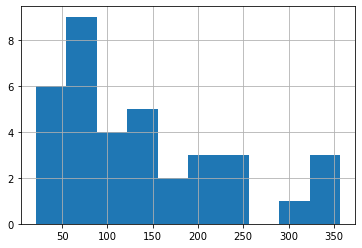

In [9]:
# One sample t-test를 위한 가정 체크
# → 자료가 정규분포를 따른다거나, 심하게 편중되거나 극단치가 포함되는 경우, 표본 수가 50(혹은 30)개 이상

session_times.Time.hist()
plt.show()

#### 검정통계량과 P-value의 계산  
    - 귀무가설이 참이라고 가정할 때 아래의 T-통계량은 자유도 n-1을 가지는 t분포를 따름  
$$ T-statistics =\frac{\bar x - \mu_0 }{s/\sqrt n } \sim t_{n-1}$$  

In [10]:
# One Sample T-test
# 귀무가설이 참이라고 가정할 때, T 통계량은 자유도 n-1을 갖는 T 분포를 따름

t_result = stat.ttest_mean(value = 160, alternative='smaller')
print('T_statistics: %.3f, p-value: %.3f, degrees of freedom: %i' %(t_result))

T_statistics: -1.197, p-value: 0.120, degrees of freedom: 35


In [11]:
ad = pd.read_csv(data_path + 'Advertising.csv')
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


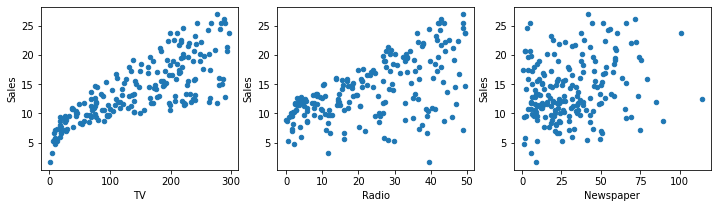

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
ad.plot.scatter('TV', 'Sales', ax = axes[0])
ad.plot.scatter('Radio', 'Sales', ax = axes[1])
ad.plot.scatter('Newspaper', 'Sales', ax = axes[2])
plt.show()

### 상관분석 vs 회귀분석
- 상관분석
    - 두 변수 간의 선형관계의 강도 측정
    - 인과관계 없음
    - False 상관관계 유의
    
- 회귀분석
    - 원인이 되는 변수 (설명변수)에 따른 종속변수의 결과 예측 (의존적 관계) 
    - 둘 이상의 변수들 간의 관계 
    - 상관관계 포함
    - 인과관계는 통계학의 범주를 넘어서서 이론적인 선험적인 고려가 선행되어야 한다. 

### 1.2.1 단순 선형회귀 모형 
#### Example: Advertisement 
- TV 광고예산과 판매량의 관계를 선형식으로 표현
$$ Sales \approx \beta_0 + \beta_1 \times TV $$

#### 단순 선형회귀 모형
$$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i,~~~ i=1,2,\ldots,n $$

- $\beta_0$: 절편 (모수)
- $\beta_1$: 기울기 (모수)
- $\epsilon_i$: 오차항 (확률변수: 평균 0, 분산 $\sigma^2$)

#### 추정된 회귀식 
$$ \hat y_i = \hat \beta_0 + \hat \beta_1 x_i $$

- $\hat y_i$: $x_i$ 값에 대한  $y_i$의 예측값 

- $\hat \beta_0, \hat \beta_1$: 계수추정치 

#### 선형회귀모형의 가정 

- $y$와 $x$는 선형관계이다.
- 오차항은 서로 독립이다. 
- 오차항 분산은 동일하다
- 오차항은  정규분포를 따른다. 

### 1.2.2 회귀계수의 추정

- n개의 관측치 쌍이 주어진 상황
$$(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n) $$

- 어떤 $\hat y_i = \hat \beta_0 + \hat \beta_1 x$가 좋은 추정치인가?

<img src='http://drive.google.com/uc?export=view&id=1djl6jmwfZM5OHn6MrH3jv_Erz5YYdXhR' width=500 /><br>

#### 최소제곱법(Least Square Estimation; LSE) 
- 잔차(residual)
$$e_i=y_i -\hat y_i$$
    - 잔차를 줄이는 회귀선이 좋음.
- 잔차제곱합(Residual Sum of Square; RSS)
$$RSS=e_1^2 +e_2^2 + \cdots + e_n^2 $$

- 최소제곱법
    - RSS를 최소화 하는 $\hat \beta_0,\hat \beta_1$을 선택 
    
    $$ \hat \beta_1= \frac{\sum_{i=1}^n (x_i-\bar x)(y_i -\bar y)}{\sum_{i=1}^n (x_i -\bar x)^2 }$$
    $$\hat \beta_0=\bar y - \hat \beta_1 \bar x $$

In [13]:
# 최소제곱법(LSE)을 활용한 회귀선 적합과 통계량 확인

model = smf.ols('Sales ~ TV', data = ad).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.47e-42
Time:                        20:49:03   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 회귀계수의 해석
- 추정된 회귀식
$$ \hat y = 7.033 + 0.0475 x$$
- $\hat \beta_1$: TV광고 투자가 매 1천달러 증가할 경우 판매량은 47.5 유닛만큼 증가한다.
    
- $\hat \beta_0$: TV광고 투자가 0달러 일때 판매량은  7033 유닛이다(?!)  
    - $\beta_0$의 해석은 주의해야 함. 0이 데이터의 범위 안에 포함되는지 확인. 

### 1.2.3 계수 추정값의 정확도 평가
- $\hat \beta_1$의 해석 중 "47.5 유닛"이 얼마나 정확할까?
    - 다른 표본을 사용한다면? 
    - 1000개의 서로 다른 표본을 사용하여 회귀계수를 계산하였을 때 그 값의 평균과 표준편차는?
- 모회귀선과 최소제곱선

<img src='http://drive.google.com/uc?export=view&id=1imTLmKdnTwMUFfO_TPZDK9oXgmn1kAox' width=500/><br>

- 최소제곱선의 평균 
 $$E(\hat \beta_0)=\beta_0,~~E(\hat \beta_1)=\beta_1 $$

  - 특정 데이터셋에 대해 계산한 $\hat \beta_0, \hat \beta_1$은  $\beta_0, \beta_1$과 정확히 일치하지 않음 
  - 많은 수의 데이터 셋에 대해 얻은 여러 $\hat \beta_0, \hat \beta_1$을 평균하면 $\beta_0, \beta_1$와 일치 &rarr; **비편향 추정량(Unbiased estimator)**

- 최소제곱선의 표준오차 (standard error)
    - 하나의 추정값 $\hat \beta_0, \hat \beta_1$은 $\beta_0, \beta_1$과 얼마나 다를 것인가? 
    $$SE(\hat \beta_0)^2 = \sigma^2 \left[ \frac 1 n + \frac{\bar x^2 }{ \sum_{i=1}^n (x_i - \bar x)^2 }\right],~~SE(\hat \beta_1)^2 = \frac {\sigma^2 }{\sum_{i=1}^n (x_i - \bar x)^2}  $$
    - $\hat \sigma^2 = RSS/(n-2)$ 사용하여 SE를 추정 

#### 회귀계수에 대한 95% 신뢰구간
$$\hat \beta_1 \pm 2\cdot SE(\hat \beta_1),~~  \hat \beta_0 \pm 2\cdot SE(\hat \beta_0)$$

In [14]:
# 유의수준 0.05 아래에서 회귀계수에 대한 95% 신뢰구간

model.conf_int(alpha=0.05)

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


-  광고를 전혀 하지 않으면 평균 판매량은 [6130, 7940] 사이의 값으로 떨어진다 
- TV광고 투자가 매 1천달러 증가할 경우 판매량은 평균 [42, 53] 사이의 값만큼 증가한다.
&nbsp;

#### 회귀계수에 대한 가설검정
- 귀무가설, 대립가설
 $$H_0: \beta_1=0$$
 $$H_1: \beta_1\neq0$$
 
- 검정통계량
$$t=\frac{\hat \beta_1}{ SE(\hat \beta_1)}$$

- $H_0$가 사실일 때  $t ~ t_{n-2}$ 분포를 따른다.

  
- p-value
    - $H_0$가 사실일 때 어떤 값이 $|t|$와 같거나 큰 경우를 관측할 확률 
    - 실질적인 상관성이 없는데도 우연히 의미있는 상관성이 예측될 확률 
    - p-value가 충분히 작으면 상관성이 있다고 결론 ($H_0$  기각)

- 회귀계수 해석의 주의점
    - 귀무가설 $H_0: \beta_1=0$  기각하여 x와 y의 관계가   유의하다고 하더라도 x와 y 간에 원인-결과 관계가 존재한다고 결론 내릴 수는 없다.
    
    - $H0: \beta_1=0$을 기각하고 통계적 유의성만 검정할 수 있기 때문에 x와 y의 관계가 선형이라고 결론내릴 수 없다. 
    
    - $\hat \beta_0$에 대한 해석은 설명변수 자료의 범위가 0을 포함할 때만 의미가 있다. 

### 1.2.4 모델의 정확도 평가
- 모델이 데이터에 얼마나 적합한가? 

#### 결정계수 $R^2$
- 비율로 표현되는 적합도 측도
$$R^2 = \frac{TSS-RSS}{TSS} = 1-\frac{RSS}{TSS} $$
$TSS=\sum(y_i-\bar y)^2$: 총 제곱합 (회귀분석 수행 전 $Y$안에 내재된 변동량)

$TSS-RSS=\sum(\hat y_i-\bar y)^2$: 회귀를 수행함으로써 설명된 Y의 변동량 

$RSS=\sum(y_i-\hat y)^2$: 회귀식에 의해 설명되지 않는 Y의 변동량 

- $0\leq R^2 \leq 1$
- X를 사용하여 설명될 수 있는 Y의 변동 비율(proportion of variability)
    - $R^2 \approx 1$: $Y$의 변동 중 많은 부분이 회귀식에 의해 설명
    - $R^2 \approx 0$: $Y$의 변동 중 대부분이 회귀식에 의해 설명되지 않음 

In [15]:
# 회귀 모형의 설명력 확인을 위한 통계치
model.rsquared

0.611875050850071

- sales의 변동 중 61%가 TV에 대한 선형회귀에 의해 설명된다. 
- 단순선형회귀에서는 $R^2$는 피어슨 상관계수의 제곱과 같다.

In [16]:
# Sales와 TV의 선형회귀에 따른 상관계수
stats.pearsonr(ad.Sales,ad.TV)[0]**2

0.6118750508500709

### 1.2.5 예측
- 주어진 독립변수에 대한 종속변수의 값을 추정된 회귀식에 의해 예측한다.

$$\hat y= \hat \beta_0 + \hat \beta_1 x^*  $$

In [17]:
# 새로운 독립변수에 대한 예측치
pred = model.get_prediction(exog = dict(TV=100))
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.786258,0.262897,11.26782,12.304695,5.339251,18.233264


#### 신뢰구간 
- 수많은 도시에 대한 **평균** 판매량을 둘러싼 불확실성을 수량화
- TV광고에 10만달러를 지출한다면 판매량의 평균은 11268개와 12305개 사이일 것으로 95% 확신함


#### 예측구간
- **특정** 도시의 판매량에 대한 불확실성을 수량화
- TV광고에 10만달러를 지출한 도시에서 판매량은 5339개와 18233개 사이일 것으로 95% 확신함  

- 회귀식은 가지고 있는 data 범위 밖에서 예측은 주의!! (Extrapolation 문제)

## Multiple Linear Regression

In [2]:
data_path = "./data/"
ad = pd.read_csv(data_path + "Advertising.csv")

### Example: Advertising 
- TV광고 외에 라디오와 신문광고에 대한 지출도 활용하여 sales를 설명하고 싶음 
- 설명변수 각각을 사용하여 3개의 단순회귀분석 사용??  (No!)
    - 서로 다른 광고매체의 예산은 다른 회귀방정식과 연관 
$$ y_i= \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \cdots + \beta_p x_{pi} +\epsilon_i $$

## 2.1 회귀계수의 추정 
- 추정된 회귀식
$$ \hat y_i = \hat  \beta_0 + \hat\beta_1 x_{1i} + \hat\beta_2 x_{2i} + \cdots +\hat \beta_p x_{pi} $$

- RSS를 최소화 하는 최소제곱법 사용 
$$ RSS=\sum (y_i - \hat y)^2 = \sum (y_i - \hat \beta_0 - \hat \beta_1 x_{i1} - \cdots - \hat \beta_p x_{ip})^2 $$

<img src='http://drive.google.com/uc?export=view&id=1aXBr2nn7CYgchvqbIr_MsvDV5jiGCvE-' width=50%/><br>

In [3]:
model = smf.ols('Sales ~ Radio + Newspaper + TV', data = ad).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        20:59:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
TV             0.0458      0.001     32.809      0.000       0.043       0.049
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.2 모델의 유의성 평가: F 검정 
- $Y$와 $X$들 사이에 상관관계가 있는가? 
$$ H_0: \beta_1=\beta_2 =\cdots =\beta_p=0$$
$$ H_1: 적어도\ 하나의 \beta_j 는\ 0이\ 아니다.$$

- F  통계량 
    $$F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)} \sim F_{p, n-p-1}$$
    - $H_0$가 사실이면 $F=1$ 
    - F=570에 대한 p-value가 0에 가까움: 광고매채 중 적어도 하나는 판매량 증가와 상관관계가 있다는 아주 강한 증거 

## 2.3  회귀계수의 검정: T 검정
- 다른 설명변수의 효과를 조정했을 때 $X_i$가 Y와 상관관계가 있는가?
$$ H_0: \beta_i=0$$
$$ H_1: \beta_i \neq 0$$ 

- t  통계량 
$$ \frac{\hat \beta_i }{SE(\hat \beta_i)} \sim t_{n-p-1}$$
- TV와 radio의 p-value<0.05: sales를 설명하는데 유의하다.
- Newspaper의 p-value>0.05: sales를 설명하는데 유의하지 않다.
    - **TV와 라디오 광고가 모형에 포함되어 있을 경우** 신문 광고는 sales와 상관성이 있다는 증거가 없다고 결론
    - 왜? 라디오 광고에 지출을 많이 하는 마켓일 수록 신문 광고에도 더 많이 지출하는 경향이 있음
    - 그렇다면 Newspaper와 Sale의 단순 회귀모형의 결과는 어떨까?


In [4]:
# 회귀 계수의 적합성 판단

model_2 = smf.ols('Sales ~ Newspaper', data = ad).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


- Newspaper와 sales의 단순회귀모형에서는 회귀계수가 유의하다는 결과가 나온다.
- 신문광고에 의한 판매량이라고 보이는 것이 실제로는 라디오 광고에 의한 것

#### 회귀계수의 해석 
- $\beta_i$는 _**모든 다른 독립변수가 일정할 때**_ $x_i$의 1단위 변화에 대한 $y$값 변화의 추정치

- 다른 매체에 대한 광고지출액이 일정할 때 TV광고에 1000달러 지출을 증가시키면 판매량은  45.8 unit 증가할 것이다.

- 다른 매체에 대한 광고지출액이 일정할 때 Radio광고에 1000달러 지출을 증가시키면 판매량은 188.5 unit  증가할 것이다.

## 2.4 예측
- 추정된 회귀식에 의해 예측 
$$\hat Y= \hat \beta_0 + \hat \beta_1 X_1 + \cdots + \hat \beta_p X_p $$

In [5]:
model_3 = smf.ols('Sales ~ Radio + TV', data = ad).fit()
model_3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9211,0.294,9.919,0.000,2.340,3.502
Radio,0.1880,0.008,23.382,0.000,0.172,0.204
TV,0.0458,0.001,32.909,0.000,0.043,0.048


In [6]:
pred = model_3.get_prediction(exog = dict(TV=100, Radio=20))
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.256466,0.137526,10.985254,11.527677,7.929616,14.583316


- 신뢰구간 
    - 수많은 도시에 대한 평균 판매량을 둘러싼 불확실성을 수량화
    - TV광고에 10만달러, Radio광고에 2만달러를 지출한다면 판매량의 평균은 10985개와 11528개 사이일 것으로 95% 확신함

- 예측구간
    - 특정 도시의 판매량에 대한 불확실성을 수량화
    - TV광고에 10만달러, Radio광고에 2만달러를 지출한 도시에서 판매량은 7930개와 14583개 사이일 것으로 95% 확신함  

## 2.5 회귀모형의 잠재적 문제: 회귀진단 
### 2.5.1   데이터의 비선형성 
- 잔차그래프의 확인 
    - $e_i=y_i - \hat y_i$ vs. $x_i$ 의 그래프를 확인
    - 모델이 이상적이라면 인지할만한 패턴이 존재하지 않는다.
    - 잔차 그래프가 비선형 상관성이 있다면 $\log X, \sqrt X, X^2$과 같이 설명변수들을 비선형적으로 변환하여 회귀모델에 적용하는 것이 간단한 접근법 

In [7]:
auto = pd.read_csv(data_path +"Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
model_auto = smf.ols('mpg~horsepower', data = auto).fit()
model_auto.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.9359,0.717,55.660,0.000,38.525,41.347
horsepower,-0.1578,0.006,-24.489,0.000,-0.171,-0.145


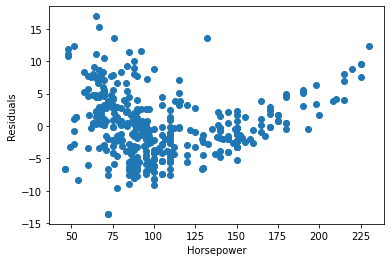

In [9]:
plt.scatter(auto.horsepower,model_auto.resid)
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.show()

In [10]:
model_auto_2 = smf.ols('mpg~horsepower+np.square(horsepower)', data = auto).fit()
model_auto_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
np.square(horsepower),0.0012,0.000,10.080,0.000,0.001,0.001


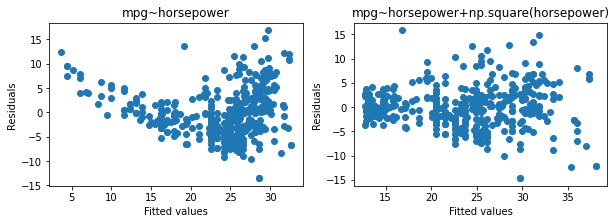

In [12]:
plt.figure(figsize=(10, 3))

plt.title('mpg~horsepower')
plt.subplot(1,2,1)
plt.scatter(model_auto.fittedvalues, model_auto.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower')

plt.subplot(1,2,2)
plt.scatter(model_auto_2.fittedvalues, model_auto_2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower+np.square(horsepower)')
plt.show()

#Polynomial regression 을 사용할 때, x의 n승을 사용한다면, 그 아래 차수까지 들어가는 x의 n승도 모두 포함해야 한다.
#log 변환은 log x1 - log x0 = log x1/x0 가 되므로, 증가율에 대한 식으로 해석할 수 있기 때문에 log 변환은 해석의 무리가 없다

### 2.5.2 오차항의 상관성 
- 선형모델의 가정: 오차항 $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$이 서로 상관되어 있지 않다는 것 
- 오차항 사이에 상관성이 있으면 추정된 표준오차는 실제 표준오차를 과소추정하는 경향이 발생한다.
    - 계산된 95% 신뢰구간과 예측구간이 실제 모수를 포함할 가능성이 95%보다 낮을 수 있다. 
    - 모수가 통계적으로 유의하다 잘못된 결론을 내릴 수 있다.

- 시계열 데이터에서 자주 발생 
    - 잔차를 시간의 함수로 그렸을 때 인지할 만한 패턴이 없어야 한다.

<img src='http://drive.google.com/uc?export=view&id=1ZjwmNStYGnMiw9WEuzFBuBPTwC_ZJ0MH' width=500/><br> 

#### Durbin-Watson 통계량 
$$ D = \frac{\sum_t (e_t-e_{t-1})^2}{\sum_t e_t^2} \approx 2(1-r)$$ 
- $r$: sample autocorrelation
- $0<D<4$
- $D \approx 2$ : no autocorrelation
- $D \approx 0$ : positive serial correlation
- $D \approx 4$ : negative serial correlation

In [13]:
x_t = np.random.normal(0, 1, 200) # 독립표본
x_t[0] = 0
y_t = np.zeros(200)
for i in range(1, 200):
    y_t[i] = np.random.normal(y_t[i - 1], 1) # 자기상관이 있는 표본

from statsmodels.stats.stattools import durbin_watson
print('Durbin-Watson statistics for x_t:', durbin_watson(x_t))
print('Durbin-Watson statistics for y_t:', durbin_watson(y_t))

#자기 상관에 발생할 수 밖에 없는 요인을 설명변수에 넣어주게 되면, 잔차는 설명이 되지 않은 부분이기 때문에 잔차의 자기 상관성이 남아 있지 않게 된다

Durbin-Watson statistics for x_t: 1.8489620962998075
Durbin-Watson statistics for y_t: 0.019439672981243664


In [14]:
durbin_watson(model_auto_2.resid)

1.078213938713128

### 2.5.3 오차항의 이분산성(heteroscedasticity)
- 선형모델의 가정: $Var(\epsilon_i)= \sigma^2$
- 잔차그래프에 깔때기 형태가 있는지 보고 식별 

#### 종속변수의 변환
- 예를 들면, $log(y)$한 뒤 회귀식을 적합

<img src='http://drive.google.com/uc?export=view&id=1qWMJojwzeKfbWmlayeeJogaIk46es9QD' width=500 /><br>

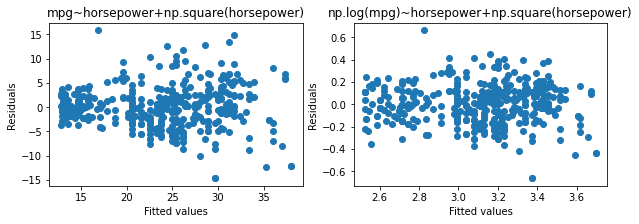

In [15]:
model_auto_3 = smf.ols('np.log(mpg)~horsepower+np.square(horsepower)', data = auto).fit()
# print(model_auto3.summary())

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.scatter(model_auto_2.fittedvalues, model_auto_2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower+np.square(horsepower)')
plt.subplot(1,2,2)
plt.scatter(model_auto_3.fittedvalues, model_auto_3.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('np.log(mpg)~horsepower+np.square(horsepower)')
plt.show()

#### 가중최소제곱(weighted least squares; WLS) 방법

$$ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i, ~~Var(\epsilon_i) = \sigma
_i^2, i=1,2,\cdots, n$$

- $1/\sigma_i^2$을 가중치로 하는 WLS 모형을 적합한다. 
- $\sigma_i^2$을 어떻게 계산하는가? 
    - 이론에 의해 알고 있는 경우 
    - 특정 변수에 따라 잔차의 분산이 커지는 경우 해당 변수의 역수(혹은 역수의 제곱)을 weight로 사용 
    - 잔차의 절대값을 종속변수로, fitted value를 설명변수로 하는 선형모형을 적합하여 그 모형의 적합값을 활용하여 weight로 설정

### 2.5.4 이상치(outlier)
- 모델이 예측한 값과 $y_i$가 크게 다른 점

<img src='http://drive.google.com/uc?export=view&id=1QpVG726vEZi2VhugMzaIe2Zpg5CGmphZ' /><br>

- 이 경우 이상치를 제거하는 것이 최소제곱선에 거의 영향을 주지 않음 

- 얼마나 커야 이상치라고 결정?
    - **스튜던트화 잔차(studentized residual)**: 잔차/추정표준오차 
    - $|스튜던트화 잔차 |>3$이면 이상치라고 판정

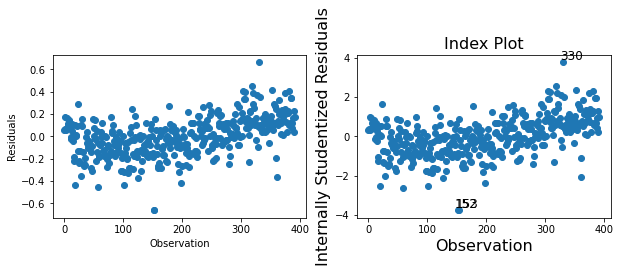

In [17]:
inf_3 = OLSInfluence(model_auto_3)
# inf3.summary_frame()
fig, ax = plt.subplots(1,2, figsize=(10, 3))
ax[0].scatter(auto.index,model_auto_3.resid)
ax[0].set_xlabel('Observation')
ax[0].set_ylabel('Residuals')
inf_3.plot_index('resid',threshold=3, ax = ax[1])
plt.show()

- 이상치 처리?
    - 이상치가 수집 또는 기록에 의한 오류에 의해 발생하였다면 관측치를 제외
    - 필요 설명변수가 없는 것과 같은 모델의 결함을 나타낼 수 있으므로 주의 

### 2.5.5 영향점 (Influential points) 
- 이상치: 주어진 $x_i$값에 대해 $y_i$ 값이 보통 수준과 다른 관측치
- 영향점: 추정회귀선에 영향을 많이 주는 관측치 

<img src='http://drive.google.com/uc?export=view&id=1MRJWP9beO9Leh6OAWaQj22LiF8ezJGYC' /><br>

#### 레버리지(leverage) 통계량
- 단순회귀분석의 경우 
$$ h_i = \frac 1 n + \frac {(x_i - \bar x)^2 }{\sum_{i'} (x_{i'} - \bar x )^2 }$$
-  $x_i$값이 $\bar x$에서 멀리 떨어져 있을 수록 레버리지 값이 크다.
- $h_i$의 평균은 $(p+1)/n$
- 레버리지와 residual이 동시에 크면 추정회귀선에 큰 영향을 준다

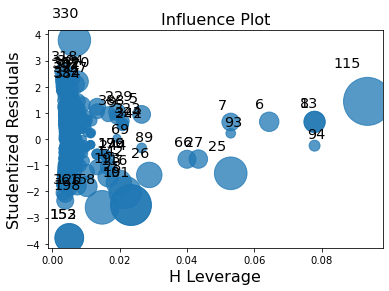

In [18]:
inf_3.plot_influence()
plt.show()

#### Cook's distance 

$$ D_i = \frac{(y_i - \hat y_i )^2}{p\cdot MSE} \frac{h_i}{(1-h_{ii})^2}$$

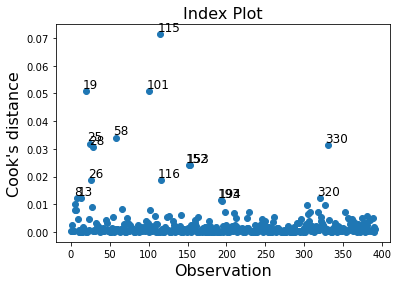

In [19]:
inf_3.plot_index('cook',threshold=4/(model_auto_3.nobs-2-1))
plt.show()
# 4/(n-p-1) 또는 4/n; n은 관측치의 갯수, p는 변수의 갯수

### 2.5.6 다중공선성(multicollinearity)
- 두 개 또는 그 이상의 설명변수들이 서로 밀접하게 상관되어 있는 경우 
- Credit 데이터

In [20]:
credit = pd.read_csv(data_path+"Credit.csv", index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


<img src='http://drive.google.com/uc?export=view&id=1f4dN4KMJud7AmJ7P-dKH71A_TSD_yaE2' /><br>

- 공선성의 존재가 일으키는 문제
    - 각 변수들의 개별효과를 분리하기 어려움
    - 계수 추정치의 불확실성 증가: $\hat \beta_j$의 표준오차 증가, 가설검정 능력의 저하 

<img src='http://drive.google.com/uc?export=view&id=1YVjwE-A_2wU6FAZbW2YwTt5swtpsZ_b7' /><br>

In [21]:
model_credit = smf.ols('Balance~Age+Limit', data = credit).fit()
model_credit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-173.4109,43.828,-3.957,0.000,-259.576,-87.246
Age,-2.2915,0.672,-3.407,0.001,-3.614,-0.969
Limit,0.1734,0.005,34.496,0.000,0.163,0.183


In [22]:
model_credit_2 = smf.ols('Balance~Rating+Limit', data = credit).fit()
model_credit_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-377.5368,45.254,-8.343,0.000,-466.505,-288.569
Rating,2.2017,0.952,2.312,0.021,0.330,4.074
Limit,0.0245,0.064,0.384,0.701,-0.101,0.150


- 공선성 검출 방법
    - 설명변수들의 상관계수 행렬 관찰 
        - 상관계수의 절대값이 크면 공선성 발생 가능
        - 모든 공선성 문제가 상관계수 행렬에 의해 발견 가능하지 않음
        - 다중공선성(multicollinearity): 세 개 또는 그 이상의 변수들 사이에 공선성 존재 가능
    - 분산팽창인수(VIF; variance inflation factor) 계산 
        $$ VIF(\hat \beta_j) = \frac {1}{1-R^2_{X_j | X_{-j}}}$$
        - $R^2_{X_j | X_{-j}}$: $X_j$를 다른 모든 설명변수들에 적합한 회귀모델의 $R^2$
        - 가능한 가장 작은 값=1: 공선성이 전혀 없음
        - VIF가 5 또는 10을 초과하면 공선성 존재한다고 경험적으로 판단 

In [23]:
model_credit_3 = smf.ols('Balance~Age+Rating+Limit', data = credit).fit()
import patsy
y, X = patsy.dmatrices('Balance~Age+Rating+Limit', credit, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 23.80295451367821
VIF of Age : 1.0113846860681328
VIF of Rating : 160.66830095856935
VIF of Limit : 160.59287978597942


- 공선성의 해결
    - 문제가 있는 변수들 중의 하나를 제거 
        - 회귀적합에 별로 나쁜 영향을 주지 않음 
    - 변수선택 방법 사용 
    - 공선성 변수들을 단일 설명변수로 결합 
        - 새로운 변수 생성
        - 주성분분석 활용 